# A simple parser for LTspice files

**Scott Prahl**

May 2022

This notebook treats files with op-amps LTspice files back to a simple netlist.

In [9]:
import ltparser
from lcapy import Circuit

%config InlineBackend.figure_format='retina'

W 1 2; right
W 3 4; right
W 5 6; right
W 1 7; down
W 8 7; right
W 7 9; right
W 4 10; down
W 11 10; right
W 10 12; right
W 13 14; right
W 5 15; down
W 13 16; down
W 17 0_2; down
W 18 0_1; down
R1 6 8 1000.0; right
R2 2 3 5000.0; right
R3 16 18 833.0; down
Vin 15 17 {Vin}; down
E1 11 0 opamp 9 14



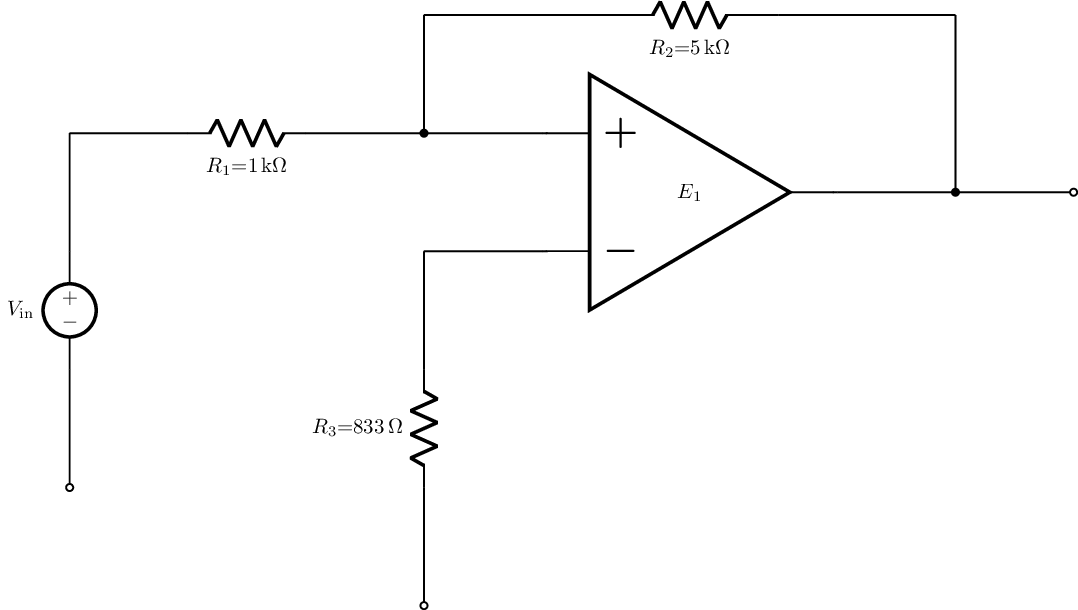

In [14]:
lt = ltparser.LTspice()
lt.read("../tests/examples/inverting-opamp-simple.asc")
lt.make_netlist()
print(lt.netlist)

# Should work now!
cct = lt.circuit()
cct.draw(scale=0.5, cmt_size=1)

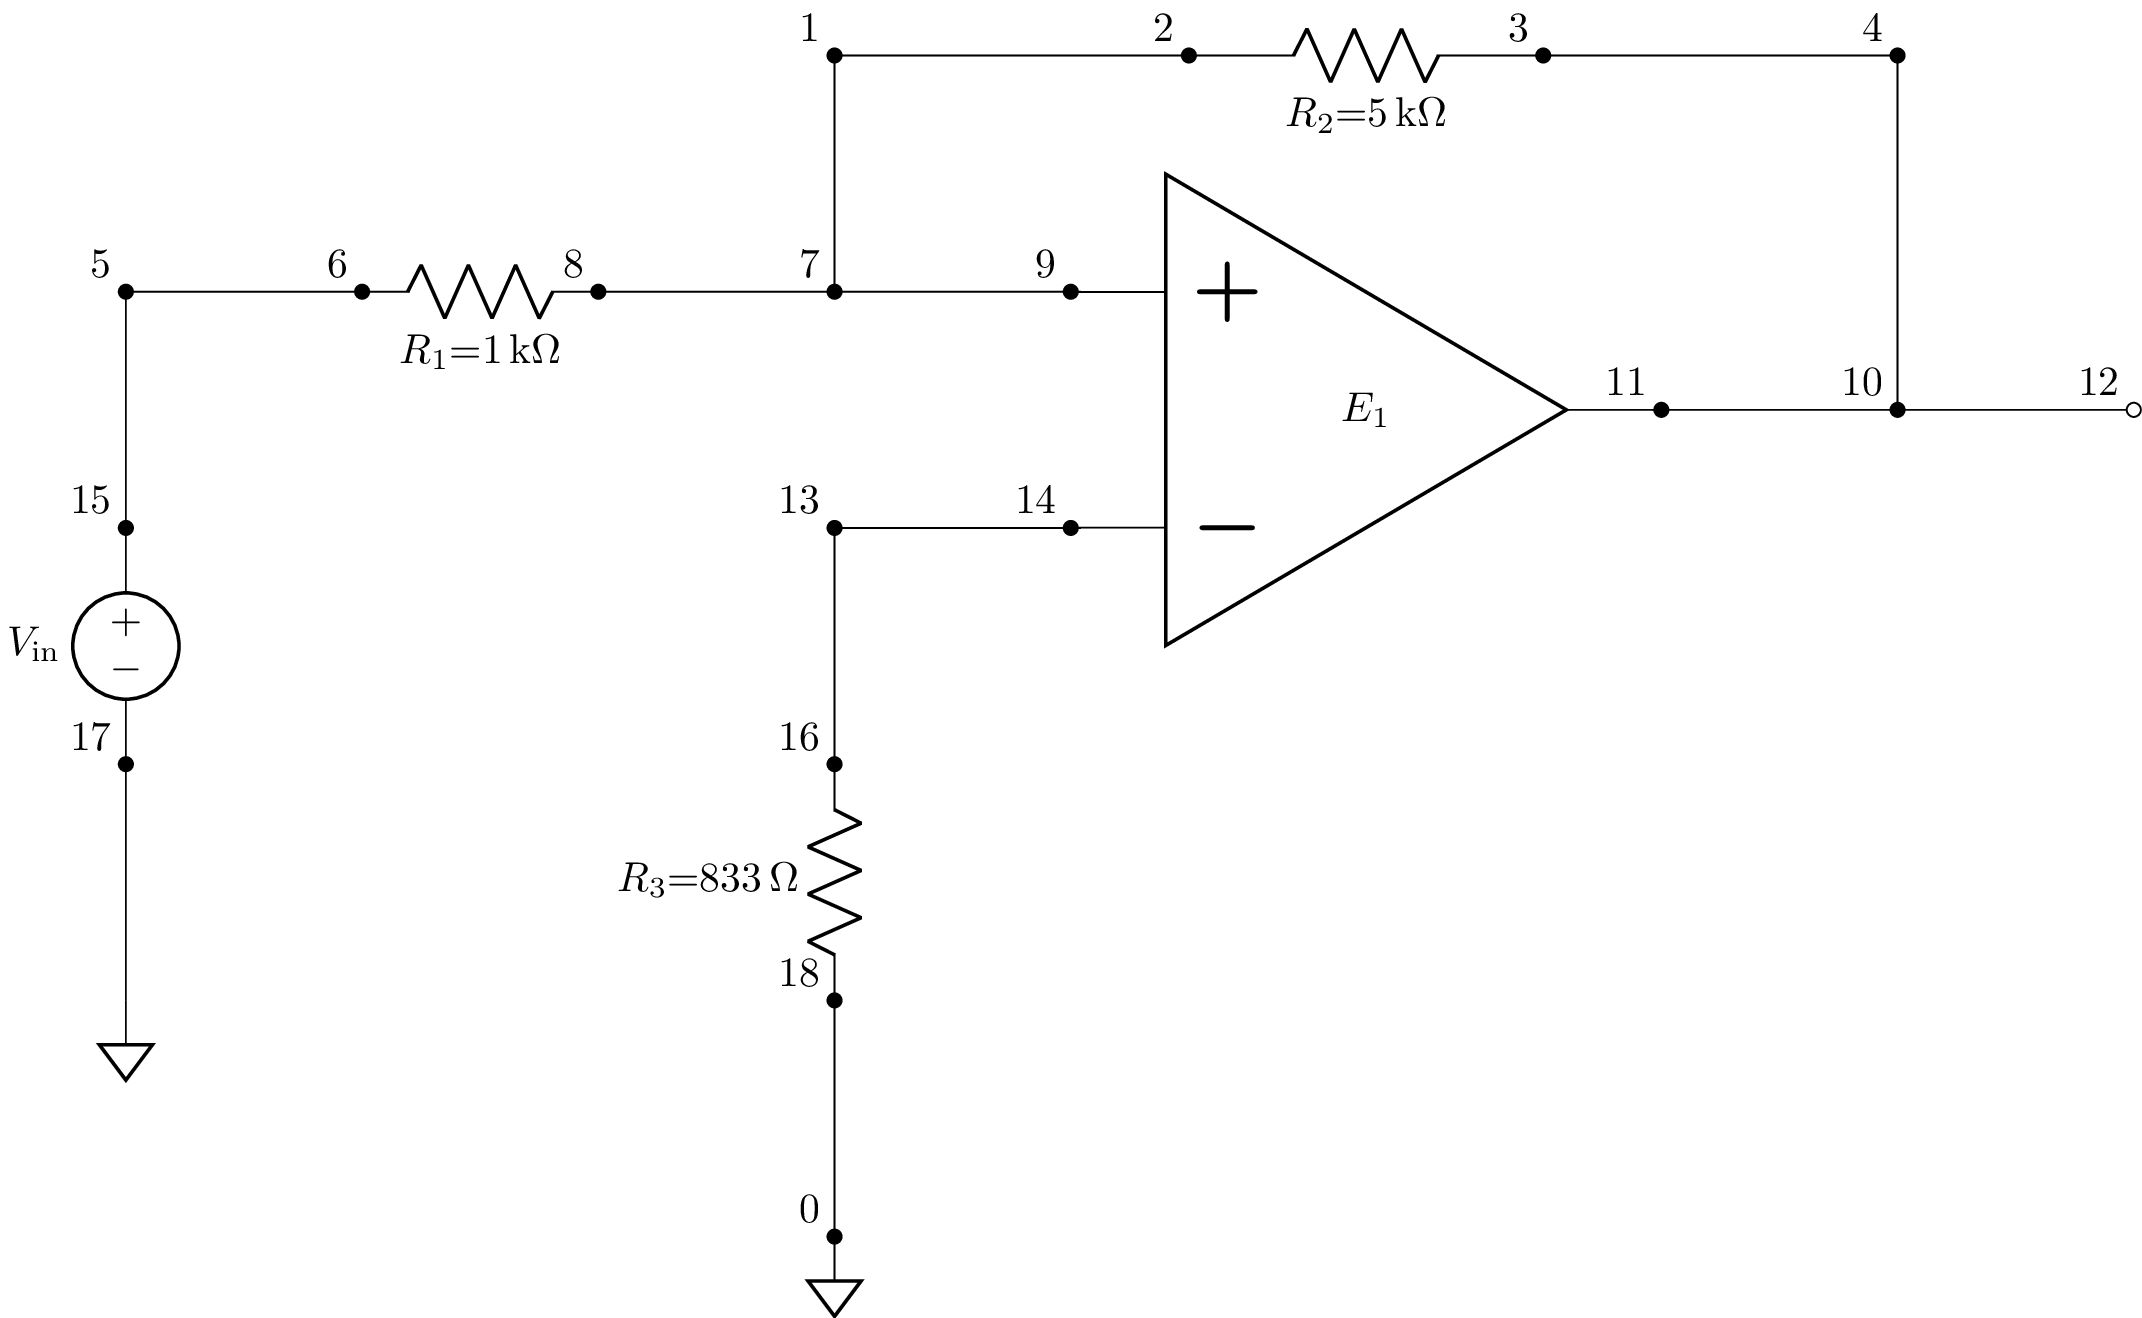

In [12]:
cct = Circuit(
    """W 1 2; right
W 3 4; right
W 5 6; right
W 1 7; down
W 8 7; right
W 7 9; right
W 4 10; down
W 11 10; right
W 10 12; right
W 13 14; right
W 5 15; down
W 13 16; down
W 17 0; down
W 18 0; down
R1 6 8 1000.0; right
R2 2 3 5000.0; right
R3 16 18 833.0; down
Vin 15 17 {Vin}; down
E1 11 0 opamp 9 14
;autoground=true"""
)
cct.draw()

Version 4
SHEET 1 880 680
WIRE 464 128 288 128
WIRE 624 128 544 128
WIRE -208 176 -208 144
WIRE 368 208 368 176
WIRE 80 224 -16 224
WIRE 288 224 288 128
WIRE 288 224 160 224
WIRE 336 224 288 224
WIRE 624 240 624 128
WIRE 624 240 400 240
WIRE 688 240 624 240
WIRE 336 256 176 256
WIRE -208 288 -208 256
WIRE -128 288 -208 288
WIRE -16 288 -16 224
WIRE 368 304 368 272
WIRE -208 320 -208 288
WIRE -128 320 -128 288
WIRE 176 352 176 256
WIRE -208 448 -208 400
WIRE -16 464 -16 368
WIRE 176 464 176 432
FLAG -128 320 0
FLAG -208 448 -Vs
FLAG -208 144 +Vs
FLAG 368 176 +Vs
FLAG 368 304 -Vs
FLAG 688 240 Vout
IOPIN 688 240 Out
FLAG 176 464 0
FLAG -16 464 0
SYMBOL Opamps/UniversalOpamp2 368 240 R0
SYMATTR InstName U1
SYMBOL res 176 208 R90
WINDOW 0 0 56 VBottom 2
WINDOW 3 32 56 VTop 2
SYMATTR InstName R1
SYMATTR Value 1k
SYMBOL res 560 112 R90
WINDOW 0 0 56 VBottom 2
WINDOW 3 32 56 VTop 2
SYMATTR InstName R2
SYMATTR Value 5k
SYMBOL res 192 448 R180
WINDOW 0 36 76 Left 2
WINDOW 3 36 40 Left 2
SYMATTR 

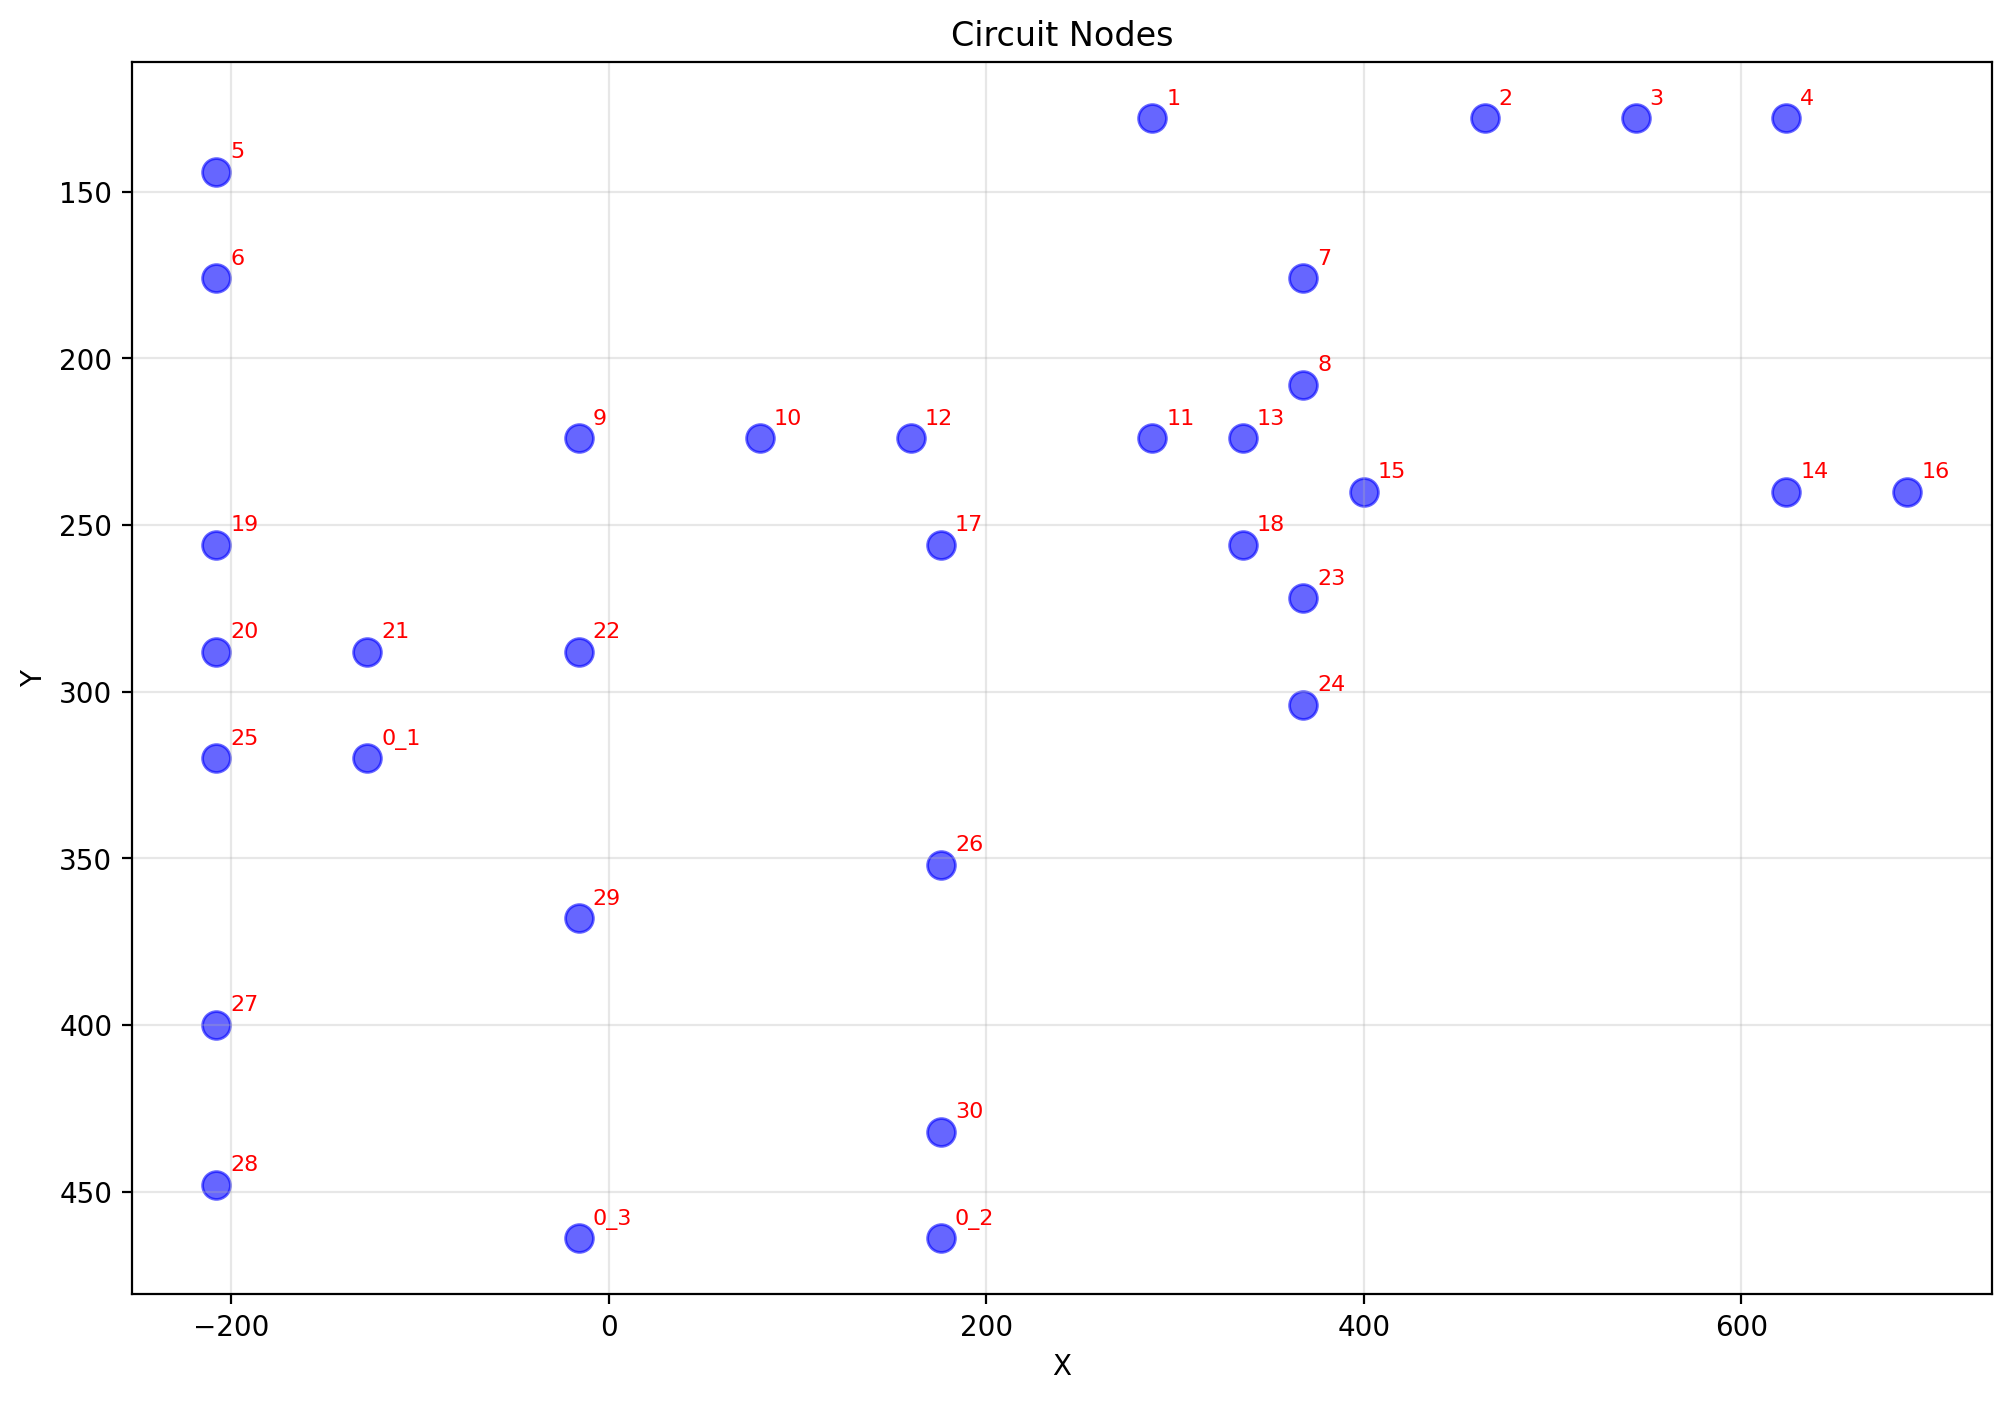

In [5]:
lt = ltparser.LTspice()
lt.read("../tests/examples/inverting-opamp.asc")
print(lt.contents)
lt.make_netlist()
print(lt.netlist)
lt.plot_nodes()

W 1 2; right
W 3 4; right
W 5 6; down
W 7 8; down
W 9 10; right
W 1 11; down
W 12 11; right
W 11 13; right
W 4 14; down
W 15 14; right
W 14 16; right
W 17 18; right
W 19 20; down
W 20 21; right
W 9 22; down
W 23 24; down
W 20 25; down
W 21 0_1; down
W 17 26; down
W 27 28; down
W 29 0_3; down
W 30 0_2; down
E1 15 23 opamp 18 13
R1 10 12 1000.0; right
R2 2 3 5000.0; right
R3 26 30 833.0; down
V1 6 19 9; down
V2 25 27 9; down
Vin 22 29 {Vin}; down



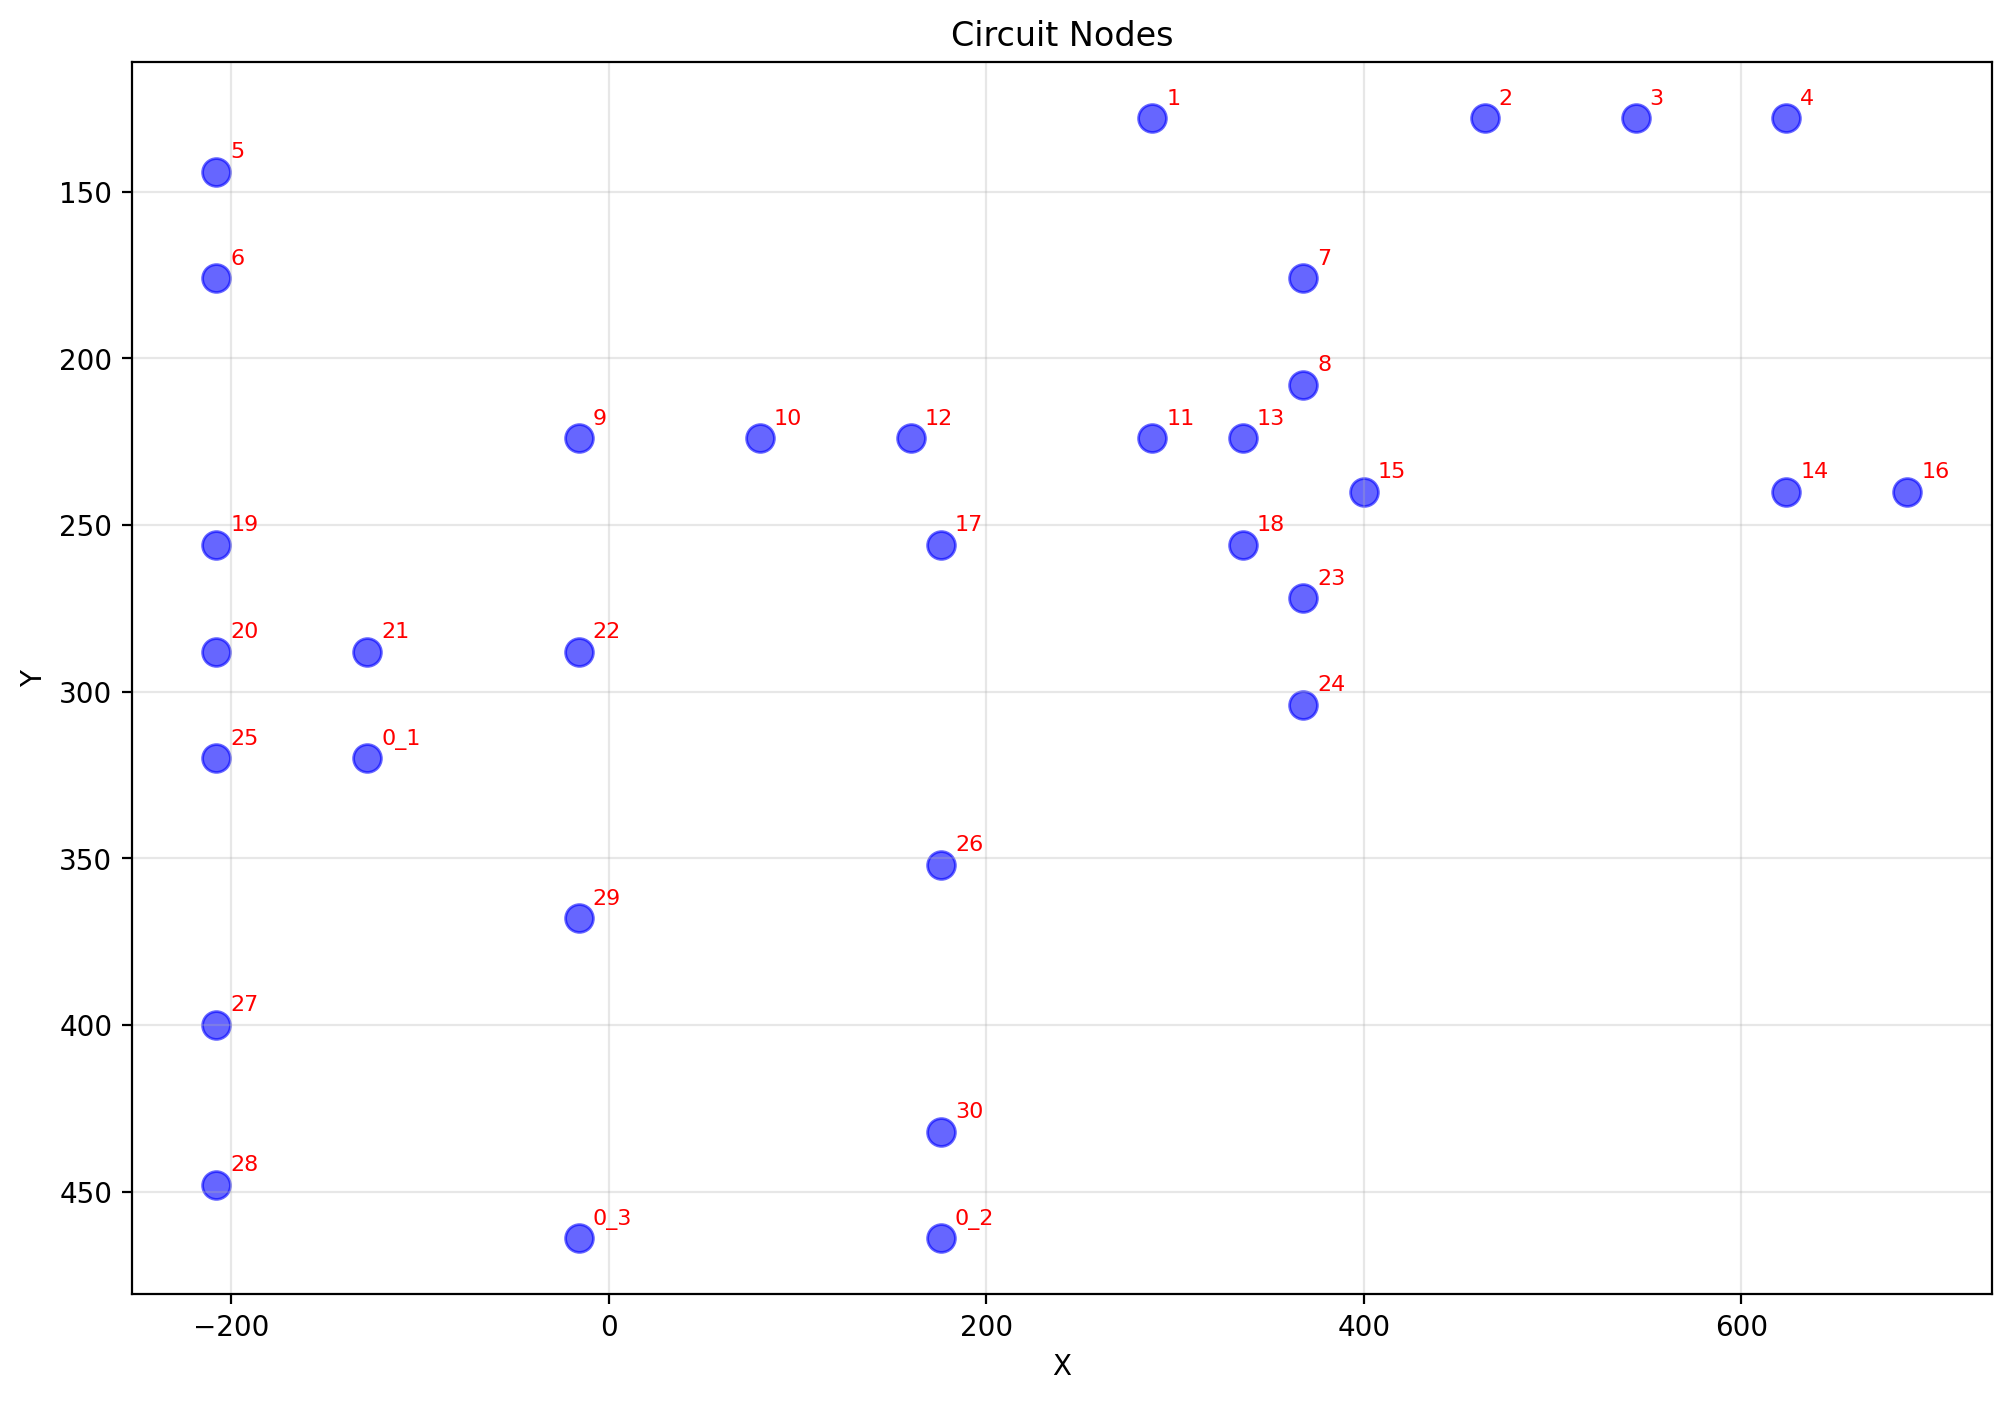

In [6]:
lt.parse()
lt.make_netlist()
print(lt.netlist)
lt.plot_nodes()

In [7]:
cct = lt.circuit()
cct.draw(scale=0.5)

ValueError: Cannot assign nodes [('5', '6', '19', '20', '25', '27', '28'), ('21', '0_1')] for horizontal graph.
@3.0 (1, 11) --1.0*--> (2)
@3.0 (1, 11) --1.0*--> (18, 13)
@2.0 (2) --1.0*--> (3)
@1.0 (3) --1.0*--> (4, 14)
@0 (4, 14) --1.0*--> (16)
@None (9, 22, 29, 0_3) --1.0*--> (10)
@None (10) --1.0*--> (12)
@None (12) --1.0*--> (1, 11)
@None (18, 13) --1.25--> (E1.mid)
@None (15) --1.0*--> (4, 14)
@None (16) --0*--> end
@0 (17, 26, 30, 0_2) --1.0*--> (18, 13)
@0 (5, 6, 19, 20, 25, 27, 28) --1.0*--> (21, 0_1)
@0 (21, 0_1) --0*--> end
@None (E1.mid) --1.25--> (15)
@None start --0*--> (9, 22, 29, 0_3)
@None start --0*--> (17, 26, 30, 0_2)
@None start --0*--> (5, 6, 19, 20, 25, 27, 28)
@None end


In [ ]:
lt = ltparser.LTspice()
lt.read("../tests/examples/audio-crossover2.asc")
lt.make_netlist()
lt.plot_nodes()
print(lt.netlist)

In [ ]:
cct = lt.circuit()
cct.draw(scale=0.5)

### Audio Cross-over

here is a simple audio crossover

<img src="images/audio_crossover.png" width=100%>

In [ ]:
lt = ltparser.LTspice()
lt.read("../tests/examples/audio-crossover.asc")
lt.make_netlist()
lt.plot_nodes()
print(lt.netlist)
cct = lt.circuit()
cct.draw(scale=0.5)